In [1]:
using PyPlot
using Random
using Distributions

In [2]:
include("model.jl");
include("ensemble.jl");
include("diagnostics.jl");
include("optimize.jl");
include("plotting.jl");

In [3]:
t = Array(2020:1.:2100);
β = 1.5 # damages (trillion $ / celsius^2)
utility_discount_rate = 0.014 # low value (stern review)
GWP = 100. # global world product (trillion $)
reduce_cost = 0.05*GWP
remove_cost = 0.15*GWP
geoeng_cost = 0.25*GWP
adapt_cost = 0.15*GWP
economics = Economics(
    β, utility_discount_rate,
    reduce_cost, remove_cost, geoeng_cost, adapt_cost,
    0., 0., 0., 0.
)

Economics(1.5, 0.014, 5.0, 15.0, 25.0, 15.0, 0.0, 0.0, 0.0, 0.0)

In [4]:
ECS₀ = 1.2
ECS= ECS₀ ./ (1. .-0.65);

In [5]:
ensemble = Dict{String, ClimateModel}();

name = "2020";
controls = init_linear_controls(t);
present_year = 2030.

model = ClimateModel(name, ECS, t, controls, economics, present_year);

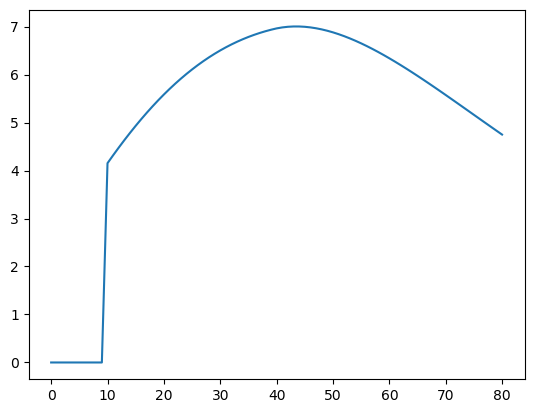

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13dcd7198>

In [6]:
plot(discounted_net_cost(model))

In [7]:
optimize!(model)
ensemble[model.name] = model;

Converged after 501 iterations. Converged after 501 iterations. 

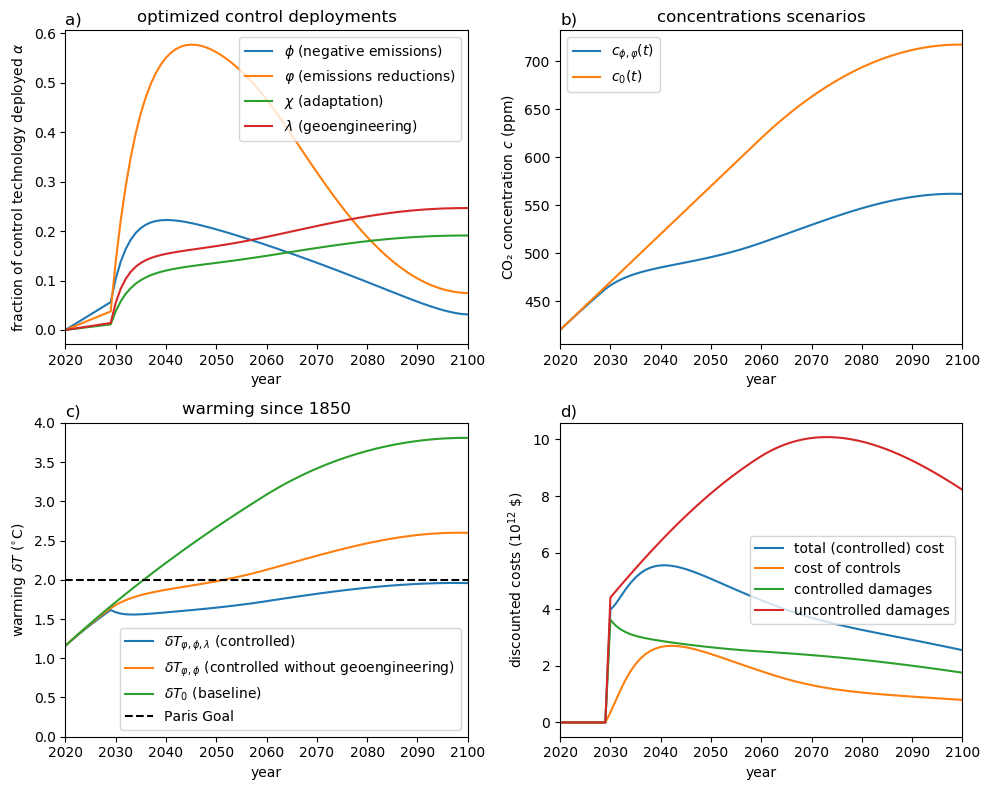

In [8]:
plot_state(model)

In [9]:
function step_forward(model::ClimateModel, Δt::Float64)

    present_year = deepcopy(model.present_year) + Δt
    name = string(Int64(round(present_year)));
    
    controls = Controls(
        deepcopy(model.controls.reduce),
        deepcopy(model.controls.remove),
        deepcopy(model.controls.geoeng),
        deepcopy(model.controls.adapt)
    )
    economics = model.economics;
    model = ClimateModel(model.name, model.ECS, model.domain, controls, economics, present_year);
    return model
end

step_forward (generic function with 1 method)

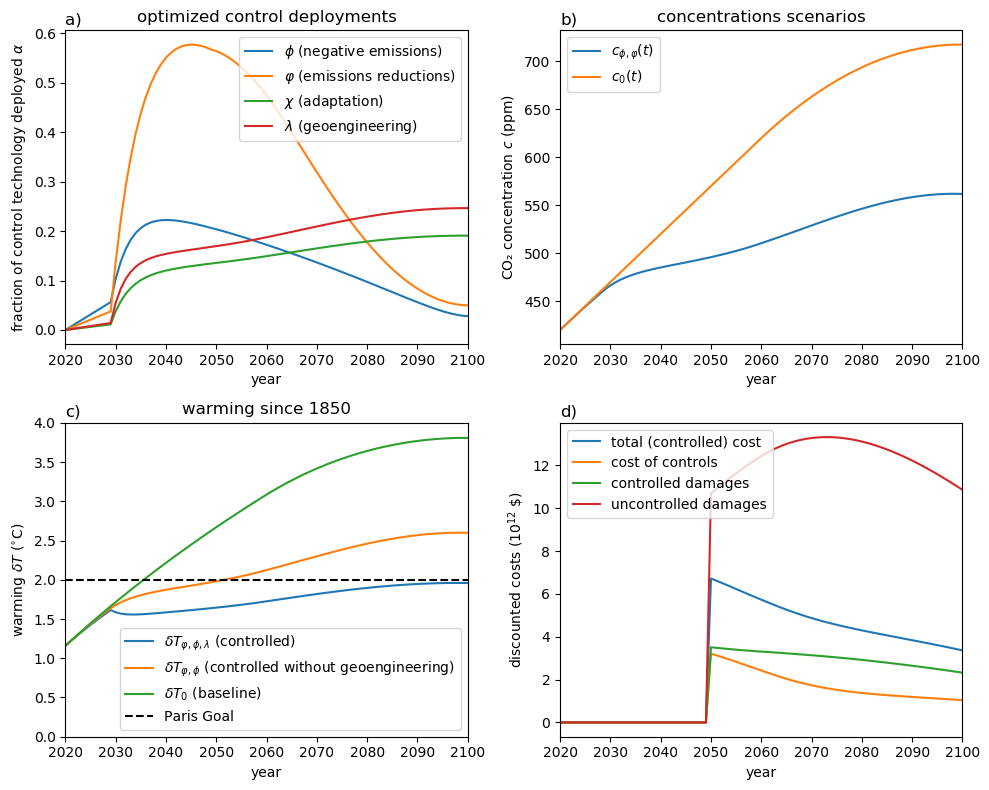

Converged after 501 iterations. Converged after 501 iterations. 

In [10]:
model = step_forward(model, 20.)
optimize!(model)
plot_state(model)
ensemble[model.name] = model;